In [125]:
import scipy
import numpy as np
import matplotlib as plt
import sklearn
from pandas import read_csv
import matplotlib.pyplot as pyplt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import os
import graphviz
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from pandas import DataFrame
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
import seaborn as sns

The scikit-learn version is 0.22.1.


In [126]:
dia = read_csv(r'X:\SLC\Term 2\ADMN 5016\Evan_Duffy\Assignment 2\diabetes.csv')
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


Our dataset has 0 nulls and all columns are able to be manipulated as they are all float and int types.

In [127]:
dia.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [128]:
dia["Classification"].value_counts()

2    64
1    52
Name: Classification, dtype: int64

Evenly balanced, so overclassification is not needed.

In [129]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
dia['clusters'] = clustering_kmeans.fit_predict(dia)

Creating our clusters to run K Means.

## Making sure the clustering worked

In [130]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
 10  clusters        116 non-null    int32  
dtypes: float64(7), int32(1), int64(3)
memory usage: 9.6 KB


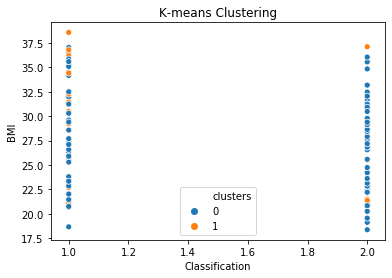

In [131]:
sns.scatterplot(x=dia["Classification"], y=dia["BMI"],hue=dia['clusters'], data=dia)
pyplt.title('K-means Clustering')
pyplt.show()

It is not feasible to represent more than one column at a time due to the nature of 2 dimensional plots. We need to reduce our features.

## Run PCA
Done to reduce our graph so that we can see the effects of Kmeans clustering on a 2D plot

In [132]:
pca_num_components = 2
diabetes = PCA(n_components=pca_num_components).fit_transform(dia)
finalDiabetes = pd.DataFrame(diabetes,columns=['pca1','pca2'])
finalDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    116 non-null    float64
 1   pca2    116 non-null    float64
dtypes: float64(2)
memory usage: 1.9 KB


In [133]:
finalDiabetes.head()

,pca1,pca2
0,-118.147008,-33.747776
1,-66.126305,-10.358581
2,19.767869,-7.549762
3,393.027125,-31.559846
4,239.019151,-15.047951


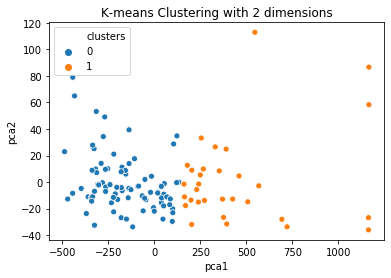

In [134]:
sns.scatterplot(x="pca1", y="pca2",hue=dia['clusters'], data=finalDiabetes)
pyplt.title('K-means Clustering with 2 dimensions')
pyplt.show()

Our data is mostly clustered as can be seen.

## K Nearest Neighbour

In [135]:
array = dia.values
X = array[:,0:8]
Y = array[:,9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41321569 0.20534238 0.16008462]


Three PCAs are able to explain 77% of the variance in the dataset. A good amount.

In [136]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[ 8 21]
 [ 8 33]]
              precision    recall  f1-score   support

         1.0       0.50      0.28      0.36        29
         2.0       0.61      0.80      0.69        41

    accuracy                           0.59        70
   macro avg       0.56      0.54      0.53        70
weighted avg       0.57      0.59      0.55        70

Accuracy 0.5857142857142857


Accuracy only 58% for our model, we will need to select a more optimal KNN

([<matplotlib.axis.XTick at 0x1ee89581400>,
 <a list of 19 Text xticklabel objects>)

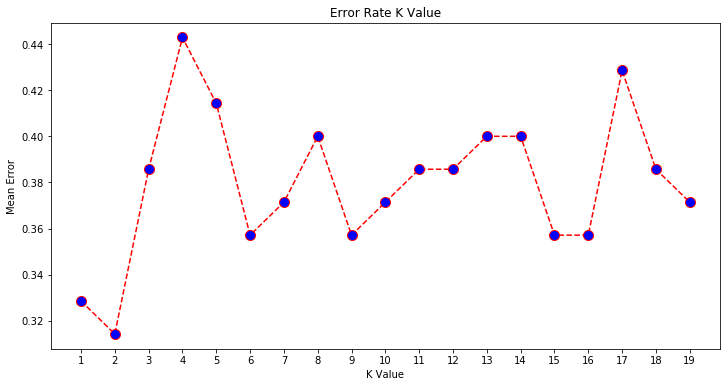

In [137]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_validation)
    error.append(np.mean(pred_i != Y_validation))
    #Looking for the optimal k value
pyplt.figure(figsize=(12, 6))
pyplt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pyplt.title('Error Rate K Value')
pyplt.xlabel('K Value')
pyplt.ylabel('Mean Error')
pyplt.xticks(np.arange(1, 20, step=1))

In [138]:
#using n_neighbors = 2
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
#Printing new Confusion Matrix with optimal neighbors
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[18 11]
 [11 30]]
              precision    recall  f1-score   support

         1.0       0.62      0.62      0.62        29
         2.0       0.73      0.73      0.73        41

    accuracy                           0.69        70
   macro avg       0.68      0.68      0.68        70
weighted avg       0.69      0.69      0.69        70

Accuracy 0.6857142857142857


Accuracy improved to 68%, good improvement but still lacking. Could be that the dataset is not big enough to fit a model more accurately.

## Decision Tree

In [139]:
array = dia.values
X = array[:,0:8]
Y = array[:,9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41321569 0.20534238 0.16008462]


In [140]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[ 7 22]
 [ 7 34]]
              precision    recall  f1-score   support

         1.0       0.50      0.24      0.33        29
         2.0       0.61      0.83      0.70        41

    accuracy                           0.59        70
   macro avg       0.55      0.54      0.51        70
weighted avg       0.56      0.59      0.55        70

Accuracy 0.5857142857142857


In [141]:
#Prunning via a cost complexity parameter
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
var = path
print(var)

{'ccp_alphas': array([0.        , 0.03952569, 0.05298913, 0.09486166, 0.11005435]), 'impurities': array([0.        , 0.07905138, 0.18502964, 0.2798913 , 0.5       ])}


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

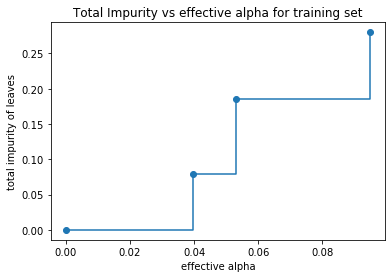

In [142]:
fig, ax = pyplt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [143]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11005434782608697


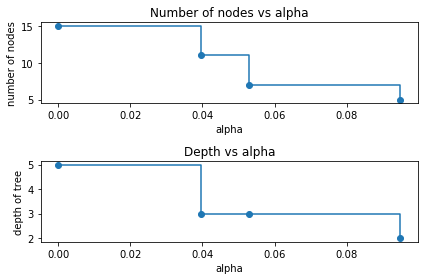

In [144]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = pyplt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

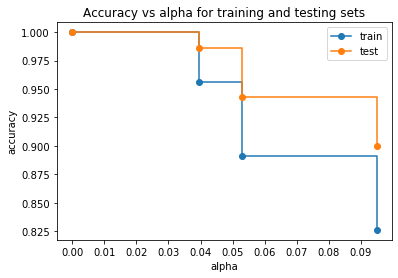

In [145]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_validation, Y_pred) for clf in clfs]

fig, ax = pyplt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
pyplt.xticks(np.arange(0, .1, step=0.01)) 
pyplt.show()

The best alpha to run our prunined decision Tree at would be at alpha = .04

In [146]:
classifier = DecisionTreeClassifier(ccp_alpha=0.04)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[ 7 22]
 [ 6 35]]
              precision    recall  f1-score   support

         1.0       0.54      0.24      0.33        29
         2.0       0.61      0.85      0.71        41

    accuracy                           0.60        70
   macro avg       0.58      0.55      0.52        70
weighted avg       0.58      0.60      0.56        70

Accuracy 0.6


Same as above, less accurate than the cancer dataset that was used last assignment

In [147]:
array = dia.values
X = array[:,0:8]
Y = array[:,9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41321569 0.20534238 0.16008462]


In [148]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [149]:
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[18 11]
 [15 26]]
              precision    recall  f1-score   support

         1.0       0.55      0.62      0.58        29
         2.0       0.70      0.63      0.67        41

    accuracy                           0.63        70
   macro avg       0.62      0.63      0.62        70
weighted avg       0.64      0.63      0.63        70

Accuracy 0.6285714285714286


Much the same as KNN, accuracy of less than 70%

## SVM

In [150]:
array = dia.values
X = array[:,0:8]
Y = array[:,9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41321569 0.20534238 0.16008462]


In [151]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[18 11]
 [14 27]]
              precision    recall  f1-score   support

         1.0       0.56      0.62      0.59        29
         2.0       0.71      0.66      0.68        41

    accuracy                           0.64        70
   macro avg       0.64      0.64      0.64        70
weighted avg       0.65      0.64      0.64        70

Accuracy 0.6428571428571429


In [152]:
array = dia.values
X = array[:,0:8]
Y = array[:,9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
classifier = SVC(kernel='poly', degree=100, gamma='auto')
classifier.fit(X_train, Y_train)

[0.41321569 0.20534238 0.16008462]


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=100, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
classifier = SVC(kernel='poly', degree=100, gamma='auto')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[23  6]
 [20 21]]
              precision    recall  f1-score   support

         1.0       0.53      0.79      0.64        29
         2.0       0.78      0.51      0.62        41

    accuracy                           0.63        70
   macro avg       0.66      0.65      0.63        70
weighted avg       0.68      0.63      0.63        70

Accuracy 0.6285714285714286


Interestingly, our accuracy falls from the linear model to polynomial. I assume this means that the dataset is more linear in nature.

## Creating the Second Dataset
I decided to try my hand at creating a second dataset from scratch. Using make_blobs, I am creatign a dataset of 100 samples and two features. Simple but useful for my needs.

In [154]:
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.2, random_state = 1)
#print (X)
obj_names = []
for i in range(0, 100):
    obj = "Object " + str(i)
    obj_names.append(obj)

In [155]:
df = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})
print(df.head())

     Object    X_value   Y_value
0  Object 0  -1.486478  3.946182
1  Object 1  -9.828480 -4.125252
2  Object 2 -10.286535 -4.054242
3  Object 3  -9.951694 -3.800946
4  Object 4  -6.559217 -8.202955


In [156]:
# Initialize the centroids
c1 = (-5, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)
def calculate_distance(centroid, X, Y):
    distances = []
    c_x, c_y = centroid
        
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)

    return distances
df['C1_Distance'] = calculate_distance(c1, df.X_value, df.Y_value)
df['C2_Distance'] = calculate_distance(c2, df.X_value, df.Y_value)
df['C3_Distance'] = calculate_distance(c3, df.X_value, df.Y_value)
print(df.head())

     Object    X_value   Y_value  C1_Distance  C2_Distance  C3_Distance
0  Object 0  -1.486478  3.946182     3.513934     2.763844     3.774516
1  Object 1  -9.828480 -4.125252     9.451663    11.151282    13.557541
2  Object 2 -10.286535 -4.054242     9.634224    11.514677    13.925410
3  Object 3  -9.951694 -3.800946     9.239807    11.099349    13.510918
4  Object 4  -6.559217 -8.202955    12.302165    11.601163    13.704504


In [157]:
df['Cluster'] = df[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis=1)
#df['Cluster'] = df['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})
print(df.head())

     Object    X_value   Y_value  C1_Distance  C2_Distance  C3_Distance  \
0  Object 0  -1.486478  3.946182     3.513934     2.763844     3.774516   
1  Object 1  -9.828480 -4.125252     9.451663    11.151282    13.557541   
2  Object 2 -10.286535 -4.054242     9.634224    11.514677    13.925410   
3  Object 3  -9.951694 -3.800946     9.239807    11.099349    13.510918   
4  Object 4  -6.559217 -8.202955    12.302165    11.601163    13.704504   

   Cluster  
0        1  
1        0  
2        0  
3        0  
4        1  


Mapping the centroids returned NaN values and as such I decided to move forward without using the mapping feature. Further research seems to be that this feature is used in python 2.7 or earlier.
Further research is needed.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Object       100 non-null    object 
 1   X_value      100 non-null    float64
 2   Y_value      100 non-null    float64
 3   C1_Distance  100 non-null    float64
 4   C2_Distance  100 non-null    float64
 5   C3_Distance  100 non-null    float64
 6   Cluster      100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [159]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = df[df['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = df[df['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = df[df['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = df[df['Cluster']=='C3']['Y_value'].mean()

C:\Users\evan-\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [160]:
# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (nan, nan)
Centroid 2 (nan, nan)


As dicussed above, the centroids return NaN, but with the way I am going forward, the Cluster column will still be able to be predicted as they are in integer form.

[[ -1.62186423   4.39263566]
 [ -6.96829932  -8.15706116]
 [-10.00804049  -3.93458703]]
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


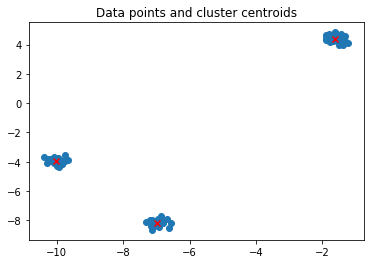

In [161]:
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get the cluster centroids
print(kmeans.cluster_centers_)

# Get the cluster labels
print(kmeans.labels_)

import matplotlib.pyplot as plt
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title('Data points and cluster centroids')
plt.show()

The dataset is clustered nicely around our 3 centroids.

## PCA

In [162]:
array = df.values
X = array[:,1:5]
Y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.91283766 0.08667894]


Only 2 PCA needed in this case as they are able to explain 100% of our data. This might be a feature of the make_blobs method, but this will bring up interesting analysis later on.

## KMeans After PCA

[[ -1.62186423   4.39263566   3.40717327   3.22697362]
 [ -6.96829932  -8.15706116  12.31634823  11.79386879]
 [-10.00804049  -3.93458703   9.38454528  11.21449636]]
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


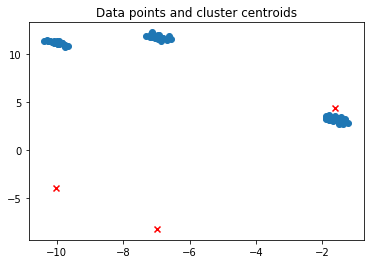

In [163]:
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get the cluster centroids
print(kmeans.cluster_centers_)

# Get the cluster labels
print(kmeans.labels_)

import matplotlib.pyplot as plt
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title('Data points and cluster centroids')
plt.show()

Our PCA components are nowhere near our previously created centroids.

## K Nearest Neighbour

In [164]:
array = df.values
X = array[:,1:5]
Y = array[:,6]
Y = Y.astype("int")
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.91283766 0.08667894]


In [165]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[24  0]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        36

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy 0.9833333333333333


([<matplotlib.axis.XTick at 0x1ee87f71fd0>,
 <a list of 39 Text xticklabel objects>)

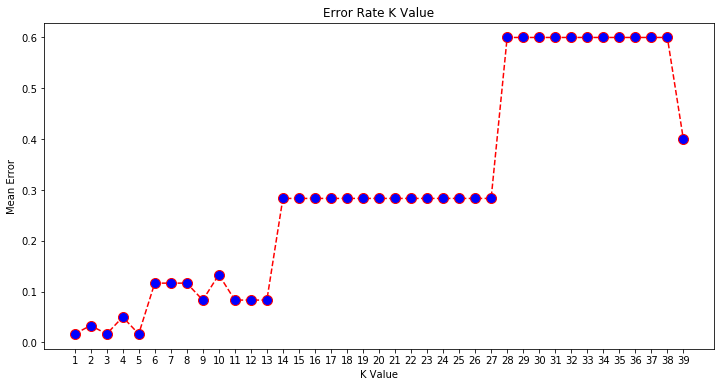

In [166]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_validation)
    error.append(np.mean(pred_i != Y_validation))
    #Looking for the optimal k value
pyplt.figure(figsize=(12, 6))
pyplt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pyplt.title('Error Rate K Value')
pyplt.xlabel('K Value')
pyplt.ylabel('Mean Error')
pyplt.xticks(np.arange(1, 40, step=1))

Optimal n happens at 1, 3 or 5, I decide to use n = 3 here

In [167]:
#using n_neighbors = 3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
#Printing new Confusion Matrix with optimal neighbors
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[24  0]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        36

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy 0.9833333333333333


Algorithms are much more accurate on this dataset. But there is no imporvement when proceeding with an optimal n_neighbours

## Decision Tree

In [168]:
array = df.values
X = array[:,1:5]
Y = array[:,6]
Y = Y.astype("int")
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.91283766 0.08667894]


In [169]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[23  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.97      0.97      0.97        36

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Accuracy 0.9666666666666667


In [170]:
#Prunning via a cost complexity parameter
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
var = path
print(var)

{'ccp_alphas': array([0.     , 0.49875]), 'impurities': array([0.     , 0.49875])}


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

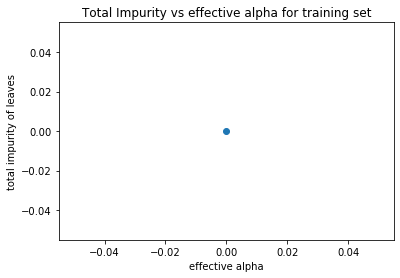

In [171]:
fig, ax = pyplt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [172]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4987500000000001


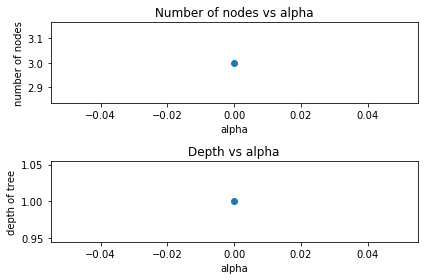

In [173]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = pyplt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

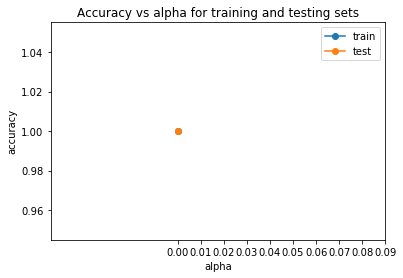

In [174]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_validation, Y_pred) for clf in clfs]

fig, ax = pyplt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
pyplt.xticks(np.arange(0, .1, step=0.01)) 
pyplt.show()

Alpha at 0 seems to be the ideal state. Could imply over fitting?

In [175]:
classifier = DecisionTreeClassifier(ccp_alpha=0.00)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[23  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.97      0.97      0.97        36

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Accuracy 0.9666666666666667


Interestingly, our optimal alpha is at 0, meaning that the model is as precise as it will be. The depth of the model confirms that it is only 1 level as well. No movement in the data as alpha is determined is interesting as well.

## Naive Bayes

In [176]:
array = df.values
X = array[:,1:5]
Y = array[:,6]
Y = Y.astype("int")
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.91283766 0.08667894]


In [177]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[21  3]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.92      1.00      0.96        36

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60

Accuracy 0.95


## SVM

In [179]:
array = df.values
X = array[:,1:5]
Y = array[:,6]
Y = Y.astype("int")
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.91283766 0.08667894]


In [180]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[19  5]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.88      1.00      0.94        36

    accuracy                           0.92        60
   macro avg       0.94      0.90      0.91        60
weighted avg       0.93      0.92      0.91        60

Accuracy 0.9166666666666666


In [181]:
array = df.values
X = array[:,1:5]
Y = array[:,6]
Y = Y.astype("int")
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.60, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
classifier = SVC(kernel='poly', degree=100, gamma='auto')
classifier.fit(X_train, Y_train)

print('--------------- SVM  kernel=poly , degree=8 : classifier.fit [Done]')
Y_pred = classifier.predict(X_validation)

print('--------------- SVM  kernel=poly , degree=8 : classifier.predict [Done]')

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[0.91283766 0.08667894]
--------------- SVM  kernel=poly , degree=8 : classifier.fit [Done]
--------------- SVM  kernel=poly , degree=8 : classifier.predict [Done]
[[ 0 24]
 [ 0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.60      1.00      0.75        36

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60

Accuracy 0.6


C:\Users\evan-\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Analysis

The diabetes dataset was used as it the subject is close to my heart. My family has a predisposition to the type 1 of the disease and I find it fascinating to look into. Being able to maybe see the
the telltale signs that may cause the disease is also interesting. Unfortunately, the data was not kind with the methods we have learned, though I am certain it will be able to be looked into with
greater detail at a later date. Or perhaps a more robust dataset might be used in the future. The second dataset was manually created via the method make_blobs and served more as a learning tool
than anything of interest. Though it ultimately did not work as intended, it was exciting that the methods discussed in class were useful and greatly imporved my knowledge, as well as generated
some question that I am keen to answer.

The methods of creating Kmeans clusters, as well as PCAs, where the ones discussed in class for the most part. Although with diabetes a simpler classification that still produced 2 clusters for our data.
The supervized learnings were the same used in the previous classes and assignments and were interesting in their right. The low accuracy yielded by the diabetes dataset are what I would assume real world
data would yield, and the make_blobs data would indicate a more tailored dataset. As such, the clusters are certainly uniform in the first dataset, but more clumped together in the second set. In the first
set the clusters are actually mixed, with the classifications intermingled. But once PCA is run to reduce dimensionality, the classifications split. In the second set, there was no hue to observe, but the data 
is clustered between the centroids that where created. Though it is interesting to note that PCA run on the second set causes the localization of the clusters to actually migrate from the centroids. I believe 
that is because they were not mapped, as explained before I could not without creating a worhtless column of NaN data.